Nama : Hajid Lutfi Hidayanto

Domisili : Surakarta

# Data Collecting

Proyek ini berjudul "credit card fraud detection" yang berguna untuk mendeteksi penipuan kartu kredit. Algoritma yang akan digunakan antara lain, decision tree, random forest, dan neural network.

Link dataset: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d nelgiriyewithana/credit-card-fraud-detection-dataset-2023

!unzip credit-card-fraud-detection-dataset-2023

 85% 121M/143M [00:01<00:00, 120MB/s] 
100% 143M/143M [00:01<00:00, 114MB/s]
Archive:  credit-card-fraud-detection-dataset-2023.zip
  inflating: creditcard_2023.csv     


# Importing Library

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Exploratory Data Analysis


In [ ]:
df = pd.read_csv('/content/creditcard_2023.csv')
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


Pada dataset ini, terdapat **31** kolom terdiri dari **29** features dan **1** label

In [ ]:
df.count()

id        568630
V1        568630
V2        568630
V3        568630
V4        568630
V5        568630
V6        568630
V7        568630
V8        568630
V9        568630
V10       568630
V11       568630
V12       568630
V13       568630
V14       568630
V15       568630
V16       568630
V17       568630
V18       568630
V19       568630
V20       568630
V21       568630
V22       568630
V23       568630
V24       568630
V25       568630
V26       568630
V27       568630
V28       568630
Amount    568630
Class     568630
dtype: int64

**Tidak** ada data **null** dalam dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

Dataset mempunyai data **kuantitatif** terdiri dari **float64** untuk seluruh features dan **int64** untuk label

0    284315
1    284315
Name: Class, dtype: int64


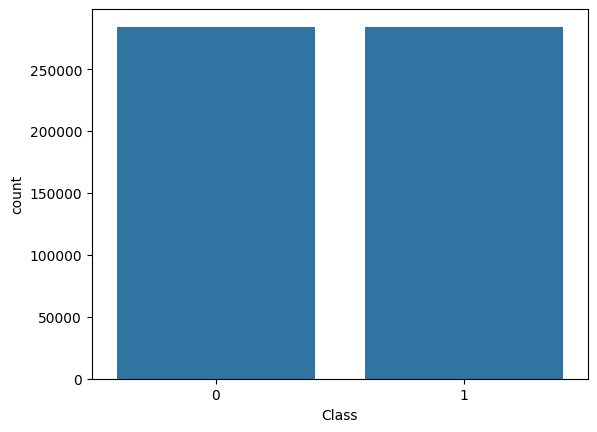

In [ ]:
sns.countplot(data=df, x='Class')
print(df['Class'].value_counts())

Dataset termasuk dataset yang sangat **balance** mempunyai **284315** sampel untuk masing-masing kelas

Penjelasan label:

1: Fraud

2: Non-fraud

In [ ]:
df.describe().round(5)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,...,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.0
mean,284314.50000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,12041.95763,0.5
std,164149.48612,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,6919.64445,0.5
min,0.00000,-3.49558,-49.96657,-3.18376,-4.95122,-9.95279,-21.11111,-4.35184,-10.75634,-3.75192,...,-19.38252,-7.73480,-30.29545,-4.06797,-13.61263,-8.22697,-10.49863,-39.03524,50.01000,0.0
25%,142157.25000,-0.56529,-0.48668,-0.64930,-0.65602,-0.29350,-0.44587,-0.28353,-0.19226,-0.56874,...,-0.16644,-0.49049,-0.23763,-0.65158,-0.55415,-0.63189,-0.30496,-0.23188,6054.89250,0.0
50%,284314.50000,-0.09364,-0.13589,0.00035,-0.07376,0.08109,0.07872,0.23337,-0.11452,0.09253,...,-0.03743,-0.02733,-0.05969,0.01590,-0.00819,-0.01189,-0.17291,-0.01393,12030.15000,0.5
75%,426471.75000,0.83266,0.34356,0.62854,0.70700,0.43974,0.49779,0.52595,0.04730,0.55926,...,0.14798,0.46388,0.15572,0.70074,0.55001,0.67289,0.33402,0.40959,18036.33000,1.0
max,568629.00000,2.22905,4.36187,14.12583,3.20154,42.71689,26.16840,217.87304,5.95804,20.27006,...,8.08708,12.63251,31.70763,12.96564,14.62151,5.62329,113.23109,77.25594,24039.93000,1.0


## Correlation Analysis

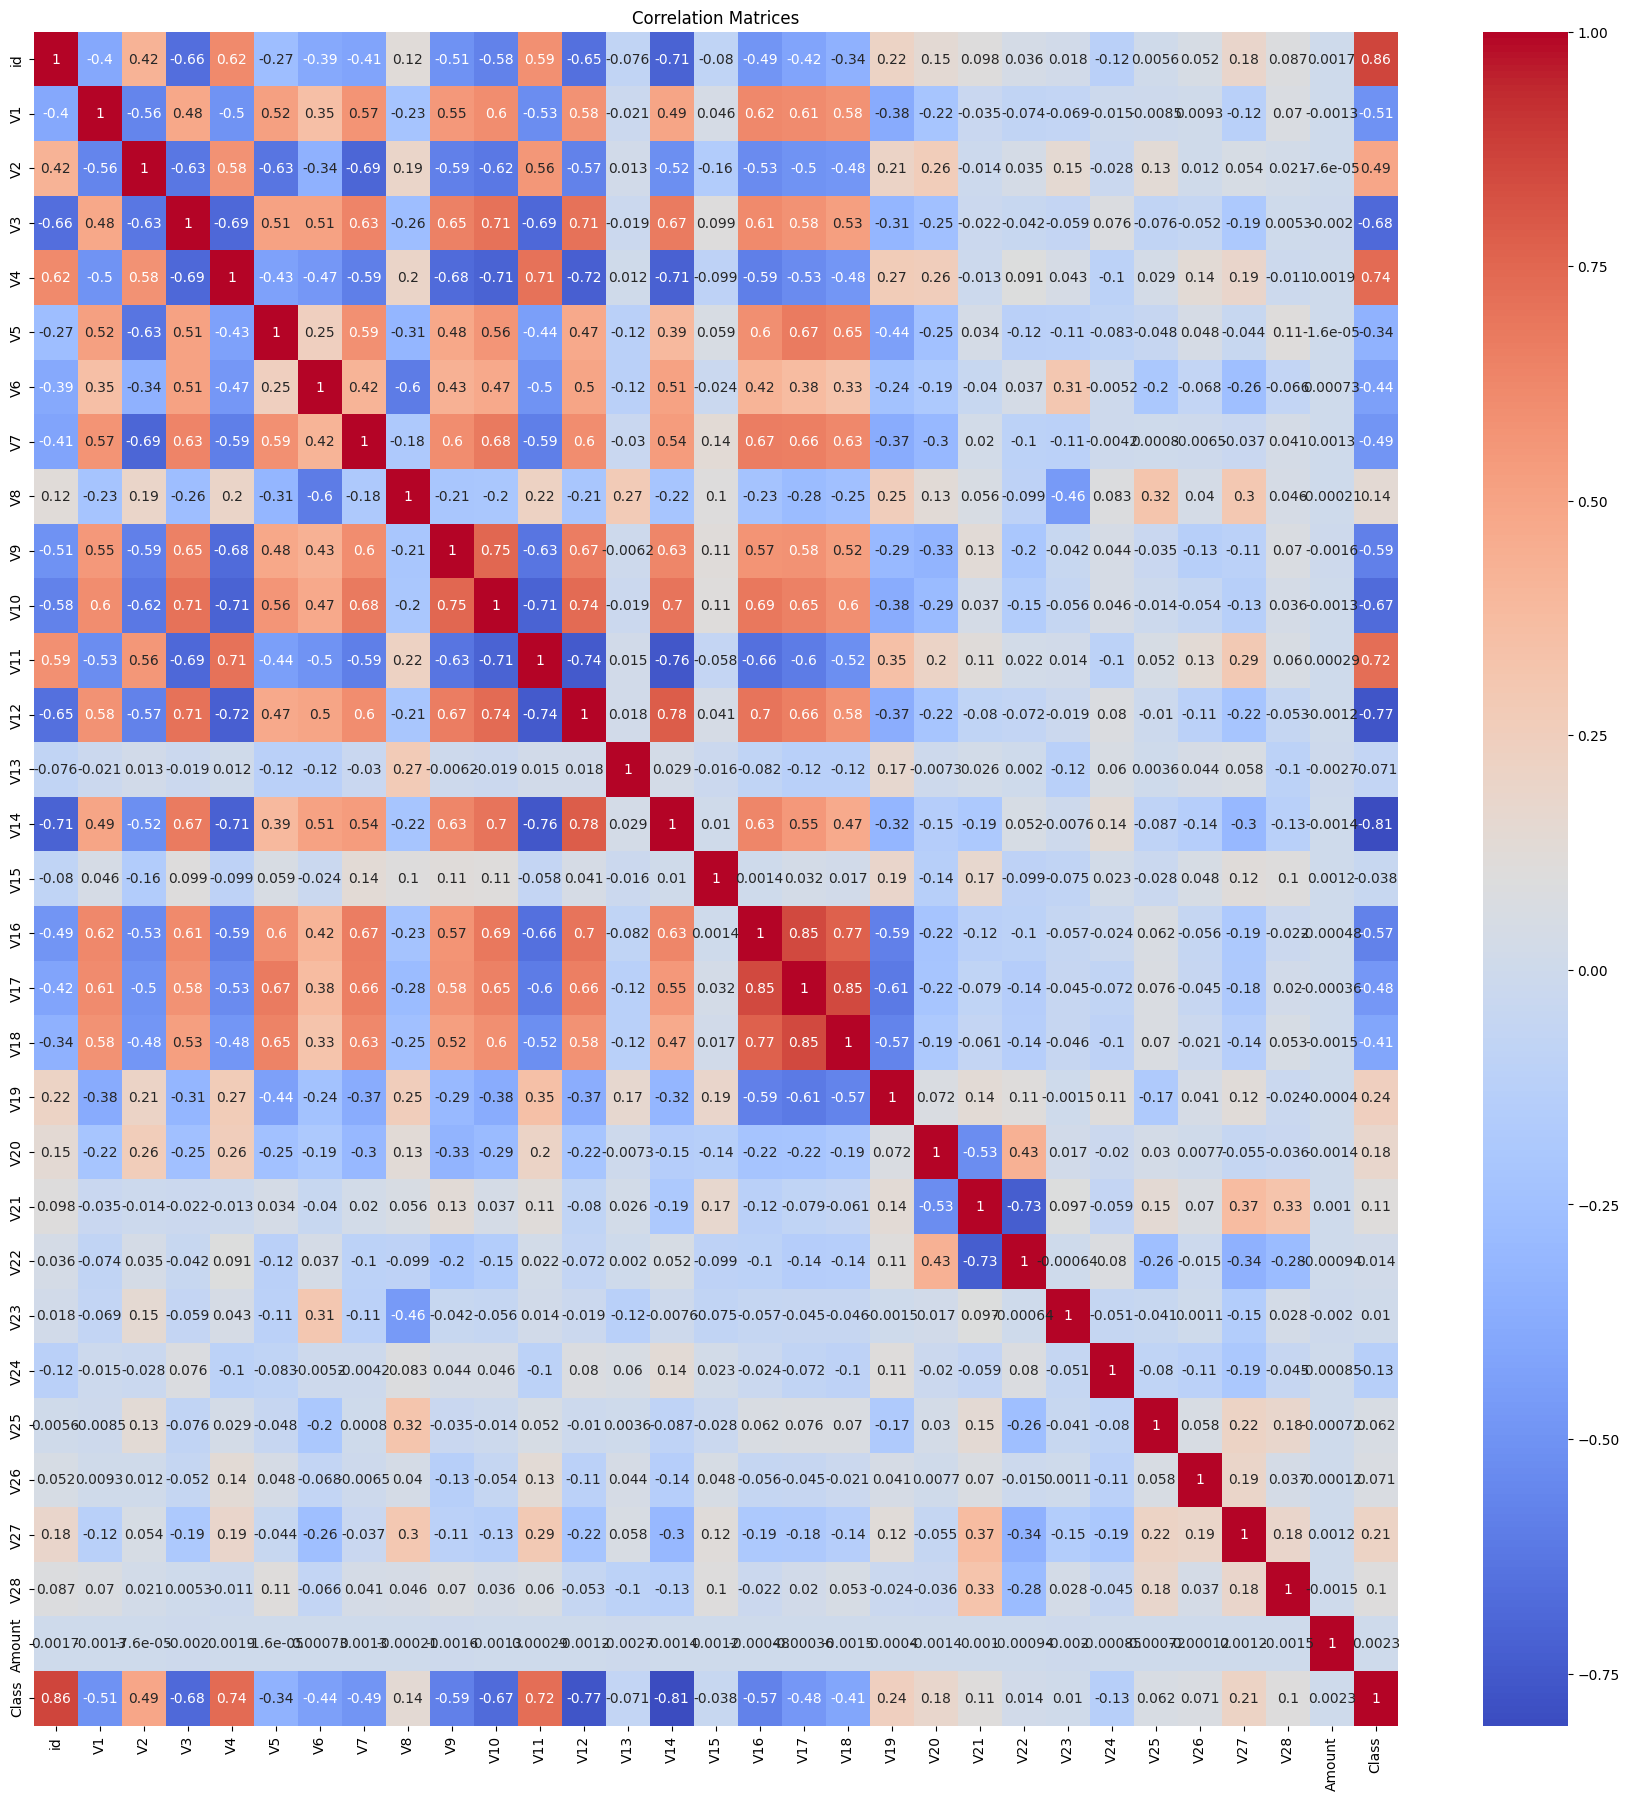

In [ ]:
plt.figure(figsize=(22, 22))
corr_matrices = df.corr()

sns.heatmap(data=corr_matrices, cmap='coolwarm', annot=True)
plt.title('Correlation Matrices')
plt.show()

In [ ]:
corr_matrices.drop(columns=['id', 'Class'], inplace=True, errors='ignore')
corr_matrices.drop(index=['id', 'Class'], inplace=True, errors='ignore')
corr_matrices

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
V1,1.000000,-0.561184,0.484499,-0.498963,0.517462,0.354728,0.573381,-0.226757,0.548973,0.599108,...,-0.219164,-0.034669,-0.073729,-0.068917,-0.014651,-0.008508,0.009281,-0.122772,0.070111,-0.001280
V2,-0.561184,1.000000,-0.627810,0.579638,-0.631669,-0.341040,-0.694022,0.191321,-0.585095,-0.621798,...,0.263707,-0.013570,0.035346,0.151906,-0.027515,0.132443,0.012219,0.053835,0.021071,-0.000076
V3,0.484499,-0.627810,1.000000,-0.687726,0.510351,0.508974,0.634336,-0.263018,0.648615,0.707676,...,-0.253805,-0.021710,-0.041970,-0.058884,0.076460,-0.076332,-0.052056,-0.190582,0.005346,-0.002001
V4,-0.498963,0.579638,-0.687726,1.000000,-0.429243,-0.474403,-0.588648,0.199013,-0.676648,-0.712839,...,0.257236,-0.013093,0.091197,0.043266,-0.102508,0.029402,0.136679,0.188036,-0.011316,0.001859
V5,0.517462,-0.631669,0.510351,-0.429243,1.000000,0.245187,0.586828,-0.314975,0.479614,0.563874,...,-0.246694,0.034147,-0.119152,-0.113919,-0.083243,-0.047845,0.047771,-0.043759,0.108422,-0.000016
V6,0.354728,-0.341040,0.508974,-0.474403,0.245187,1.000000,0.418703,-0.604491,0.432241,0.471000,...,-0.188360,-0.040153,0.036896,0.308598,-0.005237,-0.195340,-0.067605,-0.260783,-0.065641,0.000734
V7,0.573381,-0.694022,0.634336,-0.588648,0.586828,0.418703,1.000000,-0.180986,0.601789,0.678004,...,-0.299436,0.019627,-0.104043,-0.111177,-0.004152,0.000802,-0.006488,-0.036557,0.040732,0.001326
V8,-0.226757,0.191321,-0.263018,0.199013,-0.314975,-0.604491,-0.180986,1.000000,-0.208557,-0.199995,...,0.131354,0.056416,-0.098752,-0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,-0.000208
V9,0.548973,-0.585095,0.648615,-0.676648,0.479614,0.432241,0.601789,-0.208557,1.000000,0.748487,...,-0.328975,0.131001,-0.204723,-0.042371,0.044006,-0.034885,-0.131000,-0.111842,0.069959,-0.001589
V10,0.599108,-0.621798,0.707676,-0.712839,0.563874,0.471000,0.678004,-0.199995,0.748487,1.000000,...,-0.287051,0.037426,-0.150957,-0.056285,0.045935,-0.014045,-0.053684,-0.134907,0.035646,-0.001259


In [ ]:
corr_values = corr_matrices.unstack().sort_values(ascending=False)

corr_values = corr_values[corr_values != 1]
corr_values.drop_duplicates(inplace=True)
corr_values

V17  V18    0.851366
V16  V17    0.848095
V14  V12    0.783878
V16  V18    0.767992
V9   V10    0.748487
              ...   
V4   V14   -0.714847
     V12   -0.722597
V21  V22   -0.734653
V11  V12   -0.744642
V14  V11   -0.762322
Length: 406, dtype: float64

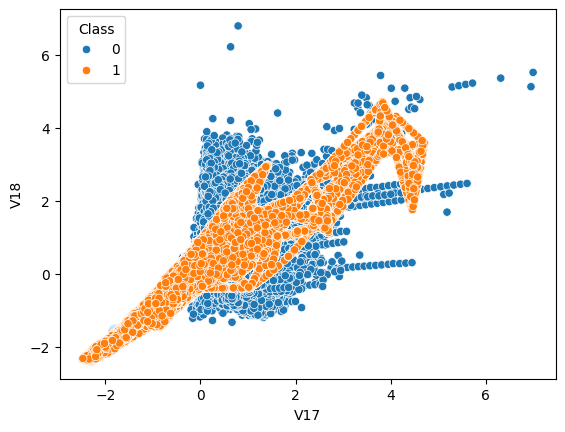

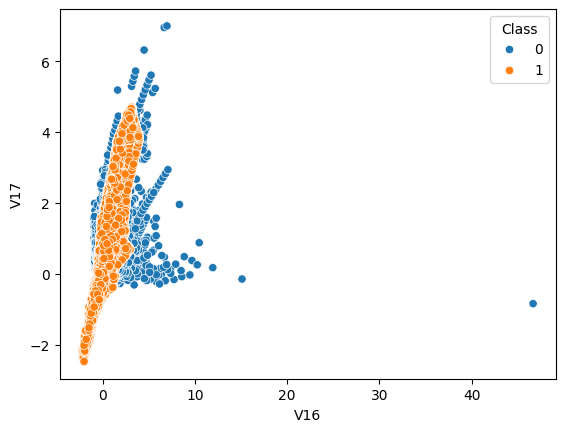

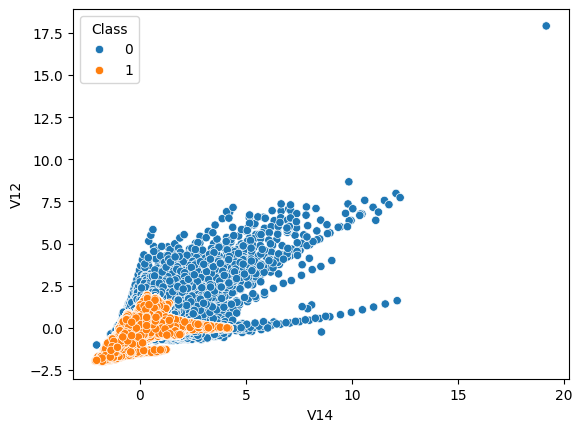

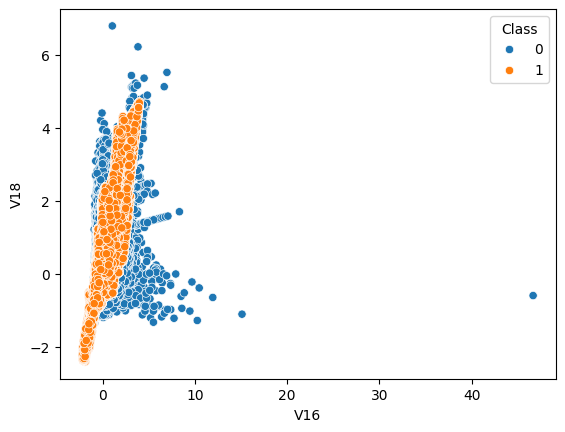

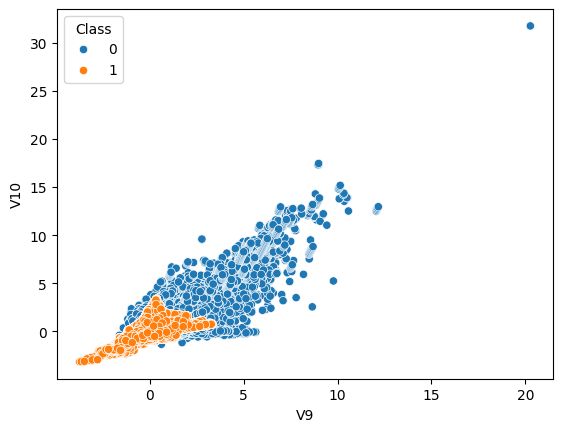

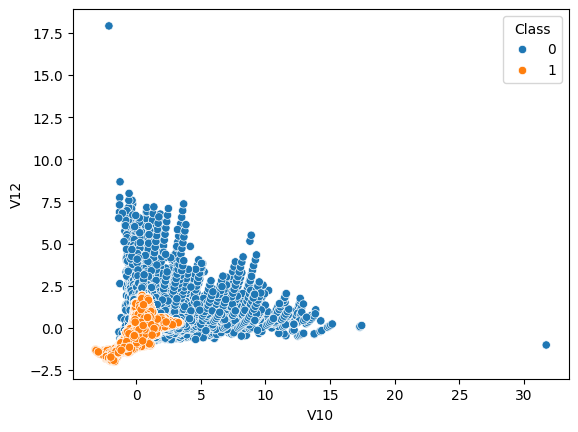

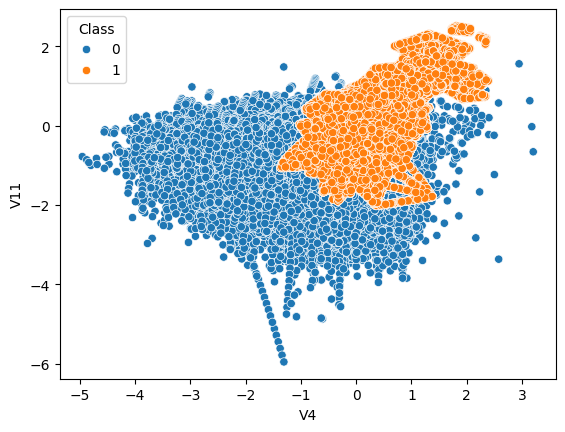

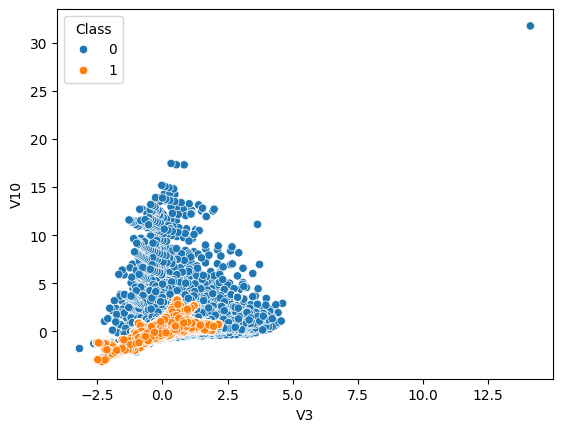

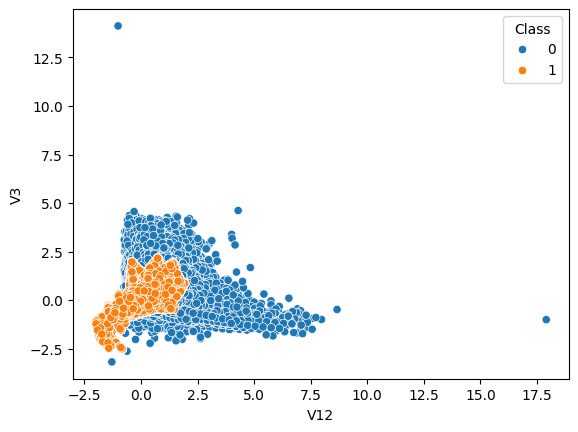

In [ ]:
for i in range(len(corr_values)):
    if corr_values[i] < 0.7:
      break
    X, y = corr_values.index[i]
    sns.scatterplot(data=df, x=X, y=y, hue='Class')
    plt.show()

Terdapat **9** correlation set yang lebih dari 0.7, maka kita akan coba gunakan **PCA** untuk mereduksi dimensi fitur

## Dataset Spliting & Scaling

### Spliting dataset

In [ ]:
X = df.drop(columns=['id', 'Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Karena jumlah dataset yang banyak, maka dataset dibagi **85%** untuk training dan **15%** untuk testing

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(483335, 29) (85295, 29) (483335,) (85295,)


### Scaling dataset

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Reducing Feature Dimension Using PCA

In [ ]:
pca = PCA(0.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
print(f"Shape of training data: {X_train.shape}")
print(f"Shape of testing data: {X_test.shape}")

Shape of training data: (483335, 22)
Shape of testing data: (85295, 22)


Menggunakan **95%** Variance Threshold untuk PCA. Dengan ini, kita berhasil mengubah dimensi fitur yang sebelumnya **29** menjadi **22**

In [ ]:
models_accuracy = pd.DataFrame(index=['train', 'test'],
                      columns=['DT', 'NN', 'RF'])

Membuat dataframe untuk menyimpan akurasi tiap model

# Model Training

## Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_predict_train=dt.predict(X_train)
dt_predict_test=dt.predict(X_test)

dt_accuracy_train = accuracy_score(y_true=y_train, y_pred=dt_predict_train)
dt_accuracy_test = accuracy_score(y_true=y_test, y_pred=dt_predict_test)

models_accuracy.loc['train', 'DT'] = dt_accuracy_train
models_accuracy.loc['test', 'DT'] = dt_accuracy_test

print(classification_report(y_true=y_test, y_pred=dt_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42637
           1       1.00      1.00      1.00     42658

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295



In [ ]:
print(models_accuracy[['DT']])

             DT
train       1.0
test   0.997245


Didapatkan hasil akurasi yang bagus dari decision tree, mencapai **0.998..** untuk testing

## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
rf.fit(X_train, y_train)

rf_predict_train = rf.predict(X_train)
rf_predict_test = rf.predict(X_test)

rf_accuracy_train = accuracy_score(y_true=y_train, y_pred=rf_predict_train)
rf_accuracy_test = accuracy_score(y_true=y_test, y_pred=rf_predict_test)

models_accuracy.loc['train', 'RF'] = rf_accuracy_train
models_accuracy.loc['test', 'RF'] = rf_accuracy_test

print(classification_report(y_true=y_test, y_pred=rf_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42637
           1       1.00      1.00      1.00     42658

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295



In [ ]:
print(models_accuracy[['RF']])

             RF
train  0.999266
test   0.998816


Didapatkan hasil yang lebih baik dari decision tree, akurasi random forest mencapai **0.9996..** untuk testing

## Neural Network Model

In [ ]:
target_accuracy = 0.9998

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > target_accuracy and logs.get('val_accuracy') > target_accuracy):
      print(f"\nAkurasi telah mencapai > {target_accuracy * 100}%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
y_train = np.asarray(y_train).astype('int64').reshape((-1,1))
y_test = np.asarray(y_test).astype('int64').reshape((-1,1))

In [ ]:
nn = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(None, X_train.shape[1])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn.compile(
    optimizer=tf.keras.optimizers.Nadam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 128)         2944      
                                                                 
 dense_1 (Dense)             (None, None, 64)          8256      
                                                                 
 dense_2 (Dense)             (None, None, 64)          4160      
                                                                 
 dropout (Dropout)           (None, None, 64)          0         
                                                                 
 dense_3 (Dense)             (None, None, 1)           65        
                                                                 
Total params: 15425 (60.25 KB)
Trainable params: 15425 (60.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
nn_history = nn.fit(X_train, y_train,
                batch_size=512,
                epochs=10,
                validation_data=(X_test, y_test),
                callbacks=[callbacks],
                verbose=2)

nn_accuracy_train = nn_history.history['accuracy'][-1]
nn_accuracy_test = nn_history.history['val_accuracy'][-1]

models_accuracy.loc['train', 'NN'] = nn_accuracy_train
models_accuracy.loc['test', 'NN'] = nn_accuracy_test

Epoch 1/10
945/945 - 10s - loss: 0.1867 - accuracy: 0.9310 - val_loss: 0.0873 - val_accuracy: 0.9666 - 10s/epoch - 10ms/step
Epoch 2/10
945/945 - 4s - loss: 0.0689 - accuracy: 0.9743 - val_loss: 0.0488 - val_accuracy: 0.9816 - 4s/epoch - 4ms/step
Epoch 3/10
945/945 - 4s - loss: 0.0395 - accuracy: 0.9864 - val_loss: 0.0289 - val_accuracy: 0.9915 - 4s/epoch - 5ms/step
Epoch 4/10
945/945 - 4s - loss: 0.0242 - accuracy: 0.9928 - val_loss: 0.0180 - val_accuracy: 0.9954 - 4s/epoch - 4ms/step
Epoch 5/10
945/945 - 4s - loss: 0.0158 - accuracy: 0.9960 - val_loss: 0.0127 - val_accuracy: 0.9972 - 4s/epoch - 4ms/step
Epoch 6/10
945/945 - 5s - loss: 0.0113 - accuracy: 0.9974 - val_loss: 0.0096 - val_accuracy: 0.9980 - 5s/epoch - 5ms/step
Epoch 7/10
945/945 - 4s - loss: 0.0087 - accuracy: 0.9981 - val_loss: 0.0079 - val_accuracy: 0.9985 - 4s/epoch - 4ms/step
Epoch 8/10
945/945 - 4s - loss: 0.0070 - accuracy: 0.9985 - val_loss: 0.0063 - val_accuracy: 0.9986 - 4s/epoch - 4ms/step
Epoch 9/10
945/945 - 

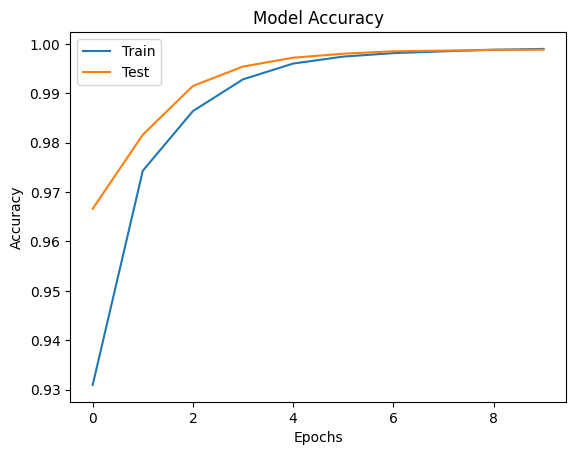

In [ ]:
plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
def model_results(model):
    pred = model.predict(X_test)
    pred = np.where(pred > 0.5, 1, 0)
    print(classification_report(y_test, pred))

In [ ]:
model_results(nn)

2666/2666 [==============================] - 5s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42637
           1       1.00      1.00      1.00     42658

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295



Didapatkan hasil yang baik tetapi tidak lebih baik daripada random forest

In [ ]:
print(models_accuracy)

             DT        NN        RF
train       1.0  0.998963  0.999266
test   0.997245  0.998804  0.998816
